In [1]:
from craft.craco_plan import PipelinePlan
from craft import uvfits
from craft.craco import bl2ant

%matplotlib notebook

In [2]:
fits = '/data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
f = uvfits.open(fits)
plan = PipelinePlan(f, "--ndm 2")

parsing values --ndm 2
Upper registers [(37, 6), (37, 7), (38, 7), (38, 8), (39, 8), (39, 9), (40, 9), (40, 10), (40, 11), (41, 11), (102, 11), (41, 12), (42, 12), (102, 12), (42, 13), (43, 13), (102, 13), (43, 14), (102, 14), (103, 14), (18, 15), (43, 15), (44, 15), (103, 15), (18, 16), (19, 16), (44, 16), (45, 16), (103, 16), (19, 17), (20, 17), (45, 17)]
Lower registers [(26, 47), (26, 48), (27, 48), (27, 49), (28, 49), (28, 50), (29, 50), (30, 51), (31, 51), (31, 52), (32, 52), (32, 53), (33, 53), (33, 54), (34, 54), (35, 54), (35, 55), (36, 55), (53, 55), (54, 55), (6, 56), (36, 56), (37, 56), (54, 56), (55, 56), (7, 57), (8, 57), (37, 57), (38, 57), (55, 57), (56, 57), (8, 58)]


<IPython.core.display.Javascript object>


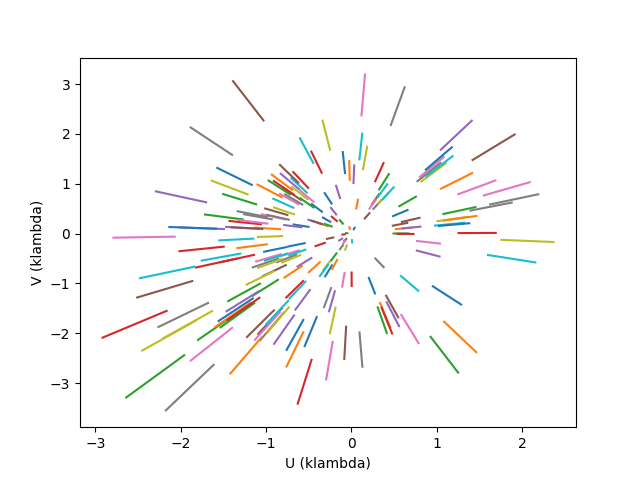

In [3]:
f.plot_baselines()

In [4]:
# WCS
plan.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 0.0  -30.0  
CRPIX : 129.0  129.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00936164957235093  0.00768834623599934  
NAXIS : 0  0

In [5]:
plan.phase_center # astropy SkyCoord object

<SkyCoord (ICRS): (ra, dec) in deg
    (0., -30.)>

In [6]:
plan.fmin

735499993.944

In [7]:
plan.fmax

990500006.0565

In [8]:
plan.tstart # astropy.Time object

<Time object: scale='utc' format='isot' value=2020-06-09T00:00:00.000>

In [9]:
plan.tstart.mjd

59009.0

In [10]:
# baseline data contains UVW in seconds:
for baseline_id, bldata in list(plan.baselines.items()):
    u = bldata['UU']
    v = bldata['VV']
    w = bldata['WW']
    ant = bl2ant(baseline_id)
    print(baseline_id, ant, u, v, w)

258.0 (1, 2) 3.9145554e-08 1.1910918e-07 9.108905e-08
259.0 (1, 3) -2.2887711e-08 1.2846125e-07 1.3164093e-07
515.0 (2, 3) -6.2033244e-08 9.352071e-09 4.0551885e-08
260.0 (1, 4) -1.0517931e-07 -1.934023e-08 8.4034944e-08
516.0 (2, 4) -1.4432486e-07 -1.3844941e-07 -7.0541084e-09
772.0 (3, 4) -8.22916e-08 -1.4780149e-07 -4.7605987e-08
261.0 (1, 5) -9.528239e-08 -1.9791852e-07 -3.9290335e-08
517.0 (2, 5) -1.3442792e-07 -3.170277e-07 -1.3037939e-07
773.0 (3, 5) -7.239468e-08 -3.263798e-07 -1.7093127e-07
1029.0 (4, 5) 9.8969215e-09 -1.785783e-07 -1.2332528e-07
262.0 (1, 6) -3.361526e-07 3.2404543e-07 4.414731e-07
518.0 (2, 6) -3.7529813e-07 2.0493624e-07 3.5038406e-07
774.0 (3, 6) -3.1326488e-07 1.9558419e-07 3.098322e-07
1030.0 (4, 6) -2.3097327e-07 3.4338566e-07 3.5743818e-07
1286.0 (5, 6) -2.4087018e-07 5.2196395e-07 4.8076345e-07
263.0 (1, 7) 3.2882699e-07 8.0185777e-07 3.6251456e-07
519.0 (2, 7) 2.8968145e-07 6.827486e-07 2.7142548e-07
775.0 (3, 7) 3.517147e-07 6.733965e-07 2.308736e-0

In [11]:
# tsamp is hardcoded
plan.tsamp_s


<Quantity 0.0017 s>

In [12]:
# Printing example candiates

In [21]:
from craco.search_pipeline import print_candidates_with_wcs,cand2str,location2pix,cand_str_wcs_header,cand2str_wcs

In [22]:
c = {'loc_2dfft':0, 'snr':1800,'time':13,'dm':13,'boxc_width':2}
print(cand2str(c, 256, 0))

28.1	128	128	2		13	13	0	1800


In [24]:
print(cand_str_wcs_header)
print(cand2str_wcs(c,1,plan))

# SNR	lpix	mpix	boxc_width	time	dm	iblk	rawsn	total_sample	obstime_sec	mjd	dm_pccm3	ra_deg	dec_deg

28.1	128	128	2		13	13	1	1800269	0.4573	59009.000005293	6.42	0.00000000	-30.000000


In [18]:
plan.wcs.pixel_to_world(128,128)

<SkyCoord (ICRS): (ra, dec) in deg
    (4.96116543e-31, -30.)>

In [19]:
plan.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 0.0  -30.0  
CRPIX : 129.0  129.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00936164957235093  0.00768834623599934  
NAXIS : 0  0